# Paper plot juypter notebook

This notebook is used to generate all the figures shown in the manuscript: 
"Error-mitigated Quantum Approximate Optimization via Learning-based Adaptive Optimization" by Lixue Cheng, Yu-Qin Chen, Shi-Xin Zhang, and Shengyu Zhang.
All the data are also available in this repo

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from matplotlib import colors

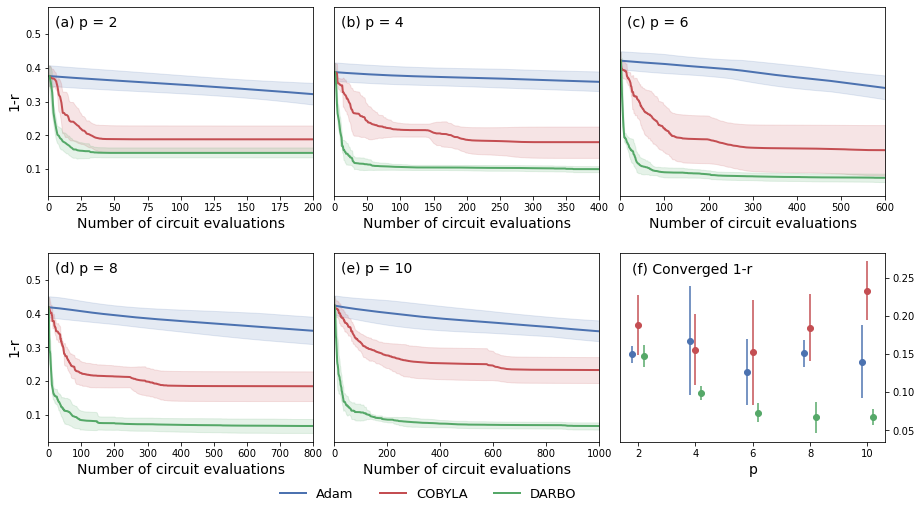

In [2]:
# Main-Figure 2
fig, axes = plt.subplots(2,3, figsize=(15,8))

axes[0][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][2].set_prop_cycle('color', sns.color_palette("deep", 10))


p = [2,4,6,8,10]
n = 5000

labels = ['Adam', 'COBYLA', 'DARBO']
color = ['#4c72b0', '#c44e52', '#55a868']
counter = 0 
for j in p:
    r = np.load('for_plotting/allgraph_nonoise_loss/allgraph_nonoise_bestr_p{}.npy'.format(j))
    for i in range(3):
        data = r[i]
        loss_avg = np.mean(data, axis = 0)
        loss_err = np.std(data, axis = 0)
        if i == 0:
            xrange = np.arange(0,1000)*(4*j+1)+1
        else:
            xrange = np.arange(1,1001)
        if counter < 3:
            pos = [0, counter]
        else:
            pos = [1, counter-3]
        axes[pos[0]][pos[1]].plot(xrange, 1-loss_avg, label=labels[i], linewidth=2, color = color[i])
        axes[pos[0]][pos[1]].fill_between(xrange, np.subtract(1-loss_avg, loss_err), np.add(1-loss_avg, loss_err), color = color[i], alpha = 0.15)
        axes[pos[0]][pos[1]].set_xlabel('Number of circuit evaluations', fontsize=14)
        axes[pos[0]][pos[1]].set_xlim([0, j*100])
        axes[pos[0]][pos[1]].set_ylim([0.02, 0.58])

    counter = counter + 1
#    axes[pos[0]][pos[1]].plot(np.arange(1,1001), np.zeros(1000), label='Brute force loss', linestyle='dashed', color='k',linewidth=2)

axes[1][2].yaxis.set_label_position("right")
axes[1][2].yaxis.tick_right()
axes[1][1].set_yticks([])
axes[0][1].set_yticks([])
axes[0][2].set_yticks([])

bestr=np.loadtxt('for_plotting/allgraph_nonoise_bestr.txt')
for i in range(3):
    axes[1][2].errorbar(x=2*np.arange(1,6)+0.2*(i-1),y=1-bestr[:,2*i], yerr= bestr[:,2*i+1], color = color[i], fmt='o', label = labels[i])


lgd=axes[1][1].legend(frameon=False,fancybox=False,bbox_to_anchor=(-0.25,-0.18),labelspacing=0.4,loc=2,fontsize=13,ncol=4)
axes[0][0].set_ylabel('1-r', fontsize=14)
axes[1][0].set_ylabel('1-r', fontsize=14)
axes[1][2].set_xlabel('p', fontsize=14)
axes[0][0].text(5, 0.52, '(a) p = 2', fontsize=14)
axes[0][1].text(10, 0.52, '(b) p = 4', fontsize=14)
axes[0][2].text(15, 0.52, '(c) p = 6', fontsize=14)
axes[1][0].text(20, 0.52, '(d) p = 8', fontsize=14)
axes[1][1].text(25, 0.52, '(e) p = 10', fontsize=14)
axes[1][2].text(1.8, 0.255, '(f) Converged 1-r', fontsize=14)


plt.subplots_adjust(hspace=0.3, wspace=0.08)
plt.savefig('figures/fig2_allgraph_nonoise_bestr.pdf', dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


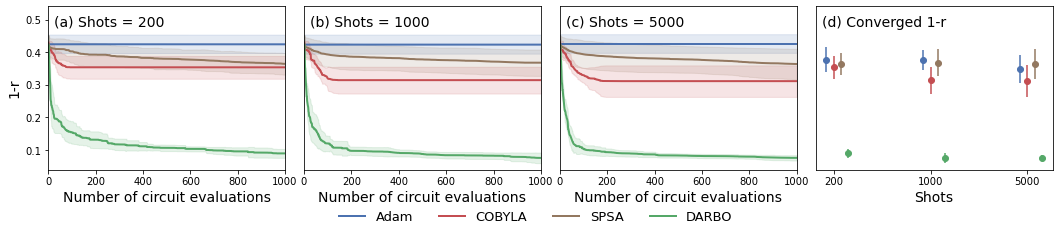

In [25]:
# Main-Figure 3
fig, axes = plt.subplots(1,4, figsize=(18,3))
axes[0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[3].set_prop_cycle('color', sns.color_palette("deep", 10))


p = 10
n = [200,1000,5000]

labels = ['Adam', 'COBYLA', 'SPSA', 'DARBO']
color = ['#4c72b0', '#c44e52','#937860', '#55a868']
counter = 0 
for j in n:
    r = np.load('for_plotting/allgraph_noise_loss/allgraph_noise_bestr_p{}_{}.npy'.format(p, j))
    for i in range(4):
        data = r[i]
        loss_avg = np.mean(data, axis = 0)
        loss_err = np.std(data, axis = 0)
        if i == 0:
            xrange = np.arange(0,1000)*(4*j+1)+1
        else:
            xrange = np.arange(1,1001)
        pos = counter
        axes[pos].plot(xrange, 1-loss_avg, label=labels[i], linewidth=2, color = color[i])
        axes[pos].fill_between(xrange, np.subtract(1-loss_avg, loss_err), np.add(1-loss_avg, loss_err), color = color[i], alpha = 0.15)
        axes[pos].set_xlabel('Number of circuit evaluations', fontsize=14)
        axes[pos].set_xlim([0, p*100])
        axes[pos].set_ylim([0.04, 0.54])
    counter = counter + 1

axes[3].yaxis.set_label_position("right")
axes[3].yaxis.tick_right()
axes[3].set_ylim([0.04, 0.54])
axes[1].set_yticks([])
axes[2].set_yticks([])
axes[3].set_yticks([])

bestr=[]
for i in range(3):
    bestr.append(np.loadtxt('for_plotting/allgraph_noise_bestr_{}.txt'.format(n[i]))[int(p/2)-1, :])
bestr = np.vstack(bestr)
for i in range(4):
    axes[3].errorbar(x=2*np.arange(3)+0.15*(i-1),y=1-bestr[:,2*i], yerr= bestr[:,2*i+1], color = color[i], fmt='o', label = labels[i])
axes[3].set_xticks([0, 2, 4])
axes[3].set_xticklabels([200, 1000, 5000])


lgd=axes[1].legend(frameon=False,fancybox=False,bbox_to_anchor=(0.1,-0.18),labelspacing=0.4,loc=2,fontsize=13,ncol=4)
axes[0].set_ylabel('1-r', fontsize=14)
axes[3].set_xlabel('Shots', fontsize=14)
axes[0].text(5*p/2, 0.48, '(a) Shots = 200', fontsize=14)
axes[1].text(5*p/2, 0.48, '(b) Shots = 1000', fontsize=14)
axes[2].text(5*p/2, 0.48, '(c) Shots = 5000', fontsize=14)
axes[3].text(-0.25, 0.48, '(d) Converged 1-r', fontsize=14)


plt.subplots_adjust(hspace=0.3, wspace=0.08)
plt.savefig('figures/fig3_allgraph_noise_bestr_p{}.pdf'.format(p), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


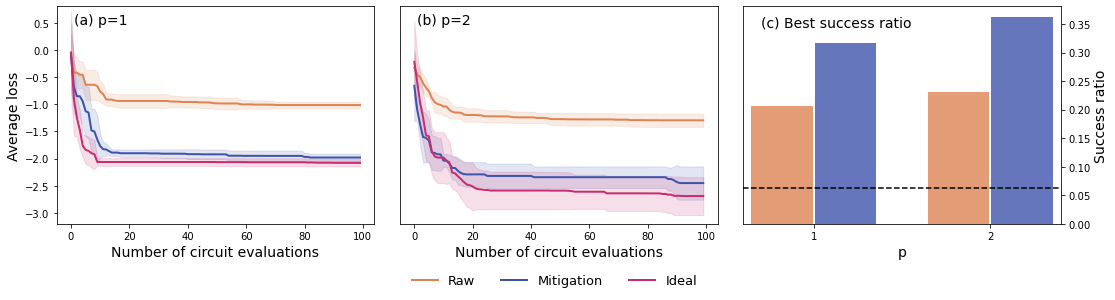

In [26]:
# Main-Figure 4
fig, axes = plt.subplots(1,3, figsize=(18,4))
p = np.array([1,2])

for n in p:
    raw = []
    mit = []
    ideal = []
    for j in range(5):
        raw.append(np.load('../results/hardware/optraw/Y_raw_hardware_exp_DARBO_optraw_100_trial{}_p{}.npy'.format(j,n))[:100])
        mit.append(np.load('../results/hardware/optmit/Y_mit_hardware_exp_DARBO_optmit_100_trial{}_p{}.npy'.format(j,n))[:100])
        ideal.append(np.load('../results/hardware/optideal/Y_ideal_hardware_exp_DARBO_optideal_100_trial{}_p{}.npy'.format(j,n))[:100])
    raw = np.hstack(raw)
    mit = np.hstack(mit)
    ideal = np.hstack(ideal)
    raw_results, raw_err = [], []
    mit_results, mit_err = [], []
    ideal_results, ideal_err = [], []
    for i in range(1,101):
        raw_results.append(np.mean(np.min(raw[0:i, :], axis = 0)))
        raw_err.append(np.std(np.min(raw[0:i, :], axis = 0)))
        mit_results.append(np.mean(np.min(mit[0:i, :], axis = 0)))
        mit_err.append(np.std(np.min(mit[0:i, :], axis = 0)))
        ideal_results.append(np.mean(np.min(ideal[0:i, :], axis = 0)))
        ideal_err.append(np.std(np.min(ideal[0:i, :], axis = 0)))

    axes[n-1].plot(np.arange(0,100), raw_results, '-', label='Raw', color ='#dd8452', linewidth=2)
    axes[n-1].fill_between(np.arange(0,100), np.subtract(raw_results, raw_err), np.add(raw_results,raw_err), color = '#dd8452', alpha = 0.15)
    axes[n-1].plot(np.arange(0,100), mit_results, '-', label='Mitigation', color ='#3E54AC', linewidth=2)
    axes[n-1].fill_between(np.arange(0,100), np.subtract(mit_results, mit_err), np.add(mit_results,mit_err), color = '#3E54AC', alpha = 0.15)
    axes[n-1].plot(np.arange(0,100), ideal_results, '-', label='Ideal', color ='#C92C6D', linewidth=2)
    axes[n-1].fill_between(np.arange(0,100), np.subtract(ideal_results, ideal_err), np.add(ideal_results,ideal_err), color = '#C92C6D', alpha = 0.15)
    axes[n-1].set_xlabel('Number of circuit evaluations', fontsize=14)
    
axes[0].set_ylabel('Average loss', fontsize=14)
axes[2].set_ylabel('Success ratio', fontsize=14)
axes[2].set_xlabel('p', fontsize=14)
axes[0].set_ylim([-3.2, 0.8])
axes[1].set_ylim([-3.2, 0.8])
axes[1].set_yticks([])
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()
axes[2].set_xticks([1,2])
axes[2].set_xticklabels([1,2])
axes[2].set_xlim([0.6, 2.4])
prob = np.array([[0.2061, 0.23101578],[0.31594655,0.36284661]])

lgd=axes[1].legend(frameon=False,fancybox=False,bbox_to_anchor=(0,-0.18),labelspacing=0.4,loc=2,fontsize=13,ncol=3)
axes[0].text(1, 0.48, '(a) p=1', fontsize=14)
axes[1].text(1, 0.48, '(b) p=2', fontsize=14)
axes[2].text(0.7, 0.345, '(c) Best success ratio', fontsize=14)
axes[2].bar(p-0.18, prob[0], color = '#dd8452', width = 0.35, alpha = 0.8)
axes[2].bar(p+0.18, prob[1], color = '#3E54AC', width = 0.35, alpha = 0.8)
axes[2].plot([0.6, 2.4], [1/16, 1/16], linestyle='dashed', color='k')

plt.subplots_adjust(hspace=0.05, wspace=0.08)
plt.savefig('figures/fig4_hardware_opt_loss_curve.pdf'.format(p), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()



In [9]:
# SI-Figure S1
colors = sns.color_palette("Spectral", 24)
fig = plt.figure(figsize=(15, 6), dpi=800)
letter = ['a','b','c','d','e']
seed=[2, 9, 16, 39, 2]
counter = 0 
for i in range(5):
    pos = 231 + counter
    plt.subplot(pos)
    example_graph = nx.read_weighted_edgelist(path='../graph/3_16_{}'.format(i), delimiter=',', nodetype=int)
    e = [(u, v) for (u, v, d) in example_graph.edges(data=True)]
    pos = nx.spring_layout(example_graph, seed=seed[i])  # positions for all nodes - seed for reproducibility
    nx.draw_networkx_nodes(example_graph, pos, node_size=500)
    options = {"node_color": "#A0CBE2","edge_color": colors, "width": 4, "with_labels": True,}
    nx.draw(example_graph, pos, **options)
    edge_labels = nx.get_edge_attributes(example_graph, "weight")
    nx.draw_networkx_edge_labels(example_graph, pos, edge_labels)
    counter = counter + 1
plt.subplot(231)
plt.text(-0.9, 0.75, '(a) Graph 0', fontsize=16)
plt.subplot(232)
plt.text(-1.1, 0.82, '(b) Graph 1', fontsize=16)
plt.subplot(233)
plt.text(-1, 0.5, '(c) Graph 2', fontsize=16)
plt.subplot(234)
plt.text(-0.95, 0.9, '(d) Graph 3', fontsize=16)
plt.subplot(235)
plt.text(-0.8, 0.9, '(e) Graph 4', fontsize=16)
plt.axis("off")
plt.subplots_adjust(wspace=-0.3,hspace=-0.3)
plt.tight_layout()
plt.savefig('si_figures/s1_weighted_graphs.pdf'.format(p), dpi=800, bbox_inches='tight')
plt.show()

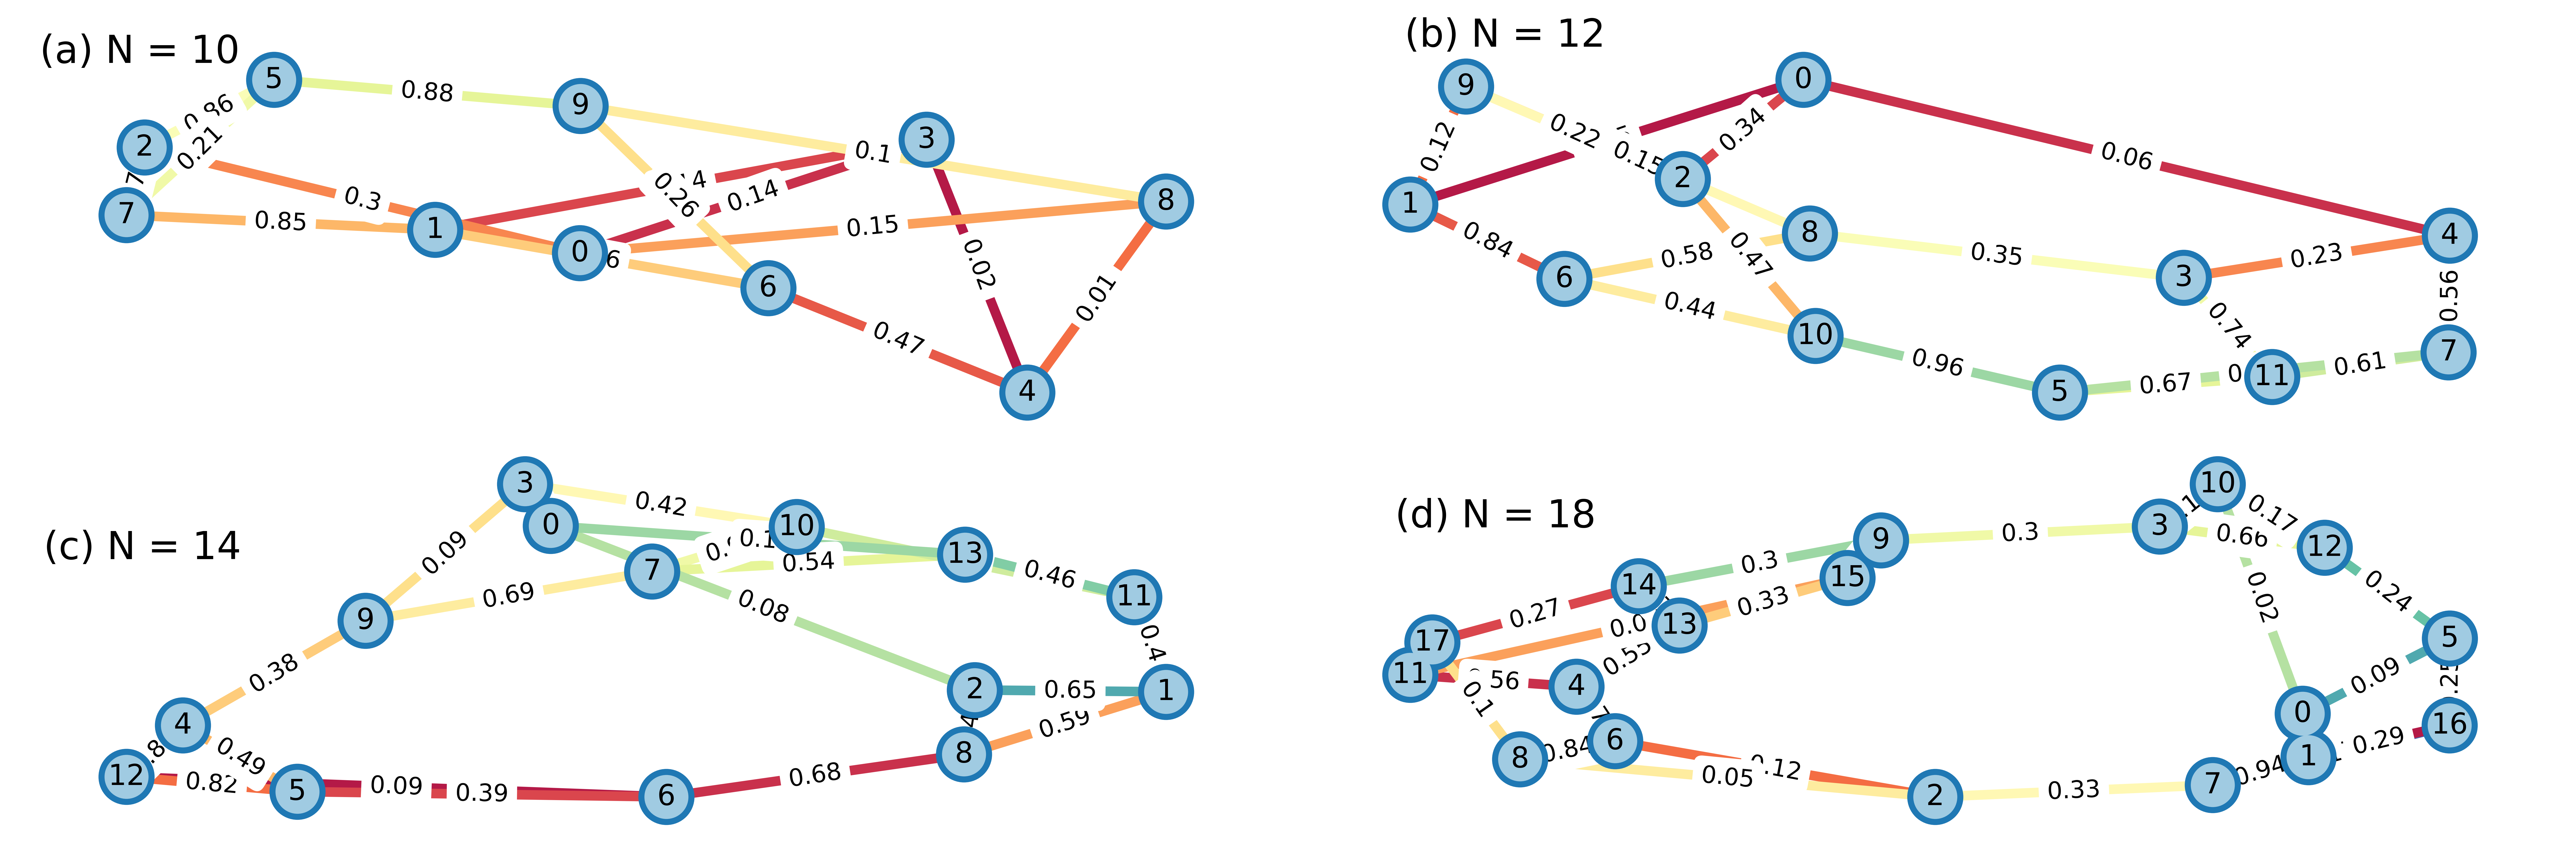

In [66]:
# SI-Figure S2
colors = sns.color_palette("Spectral", 24)
fig = plt.figure(figsize=(15, 5), dpi=800)
letter = ['a','b','c','d']
seed=[0,1,1,1,17]
counter = 0 
for i in [0,1,2,4]:
    pos = 221 + counter
    plt.subplot(pos)
    example_graph = nx.read_weighted_edgelist(path=f'../graph/3_{2*i+10}_0', delimiter=',', nodetype=int)
    e = [(u, v) for (u, v, d) in example_graph.edges(data=True)]
    pos = nx.spring_layout(example_graph, seed=seed[i])  # positions for all nodes - seed for reproducibility
    nx.draw_networkx_nodes(example_graph, pos, node_size=500)
    options = {"node_color": "#A0CBE2","edge_color": colors, "width": 4, "with_labels": True,}
    nx.draw(example_graph, pos, **options)
    edge_labels = nx.get_edge_attributes(example_graph, "weight")
    edge_labels_new = edge_labels.copy()
    for j in edge_labels.keys():
        edge_labels_new[j] = np.round(edge_labels[j],2)
    nx.draw_networkx_edge_labels(example_graph, pos, edge_labels_new)
    counter = counter + 1
plt.subplot(221)
plt.text(-1, 0.75, '(a) N = 10', fontsize=16)
plt.subplot(222)
plt.text(-0.95, 0.82, '(b) N = 12', fontsize=16)
plt.subplot(223)
plt.text(-0.8, 0.55, '(c) N = 14', fontsize=16)
plt.subplot(224)
plt.text(-0.95, 0.75, '(d) N = 18', fontsize=16)
plt.axis("off")
plt.subplots_adjust(wspace=-0.3,hspace=-0.3)
plt.tight_layout()
plt.savefig('si_figures/s2_weighted_graphs_diff_N.pdf'.format(p), dpi=800, bbox_inches='tight')
plt.show()

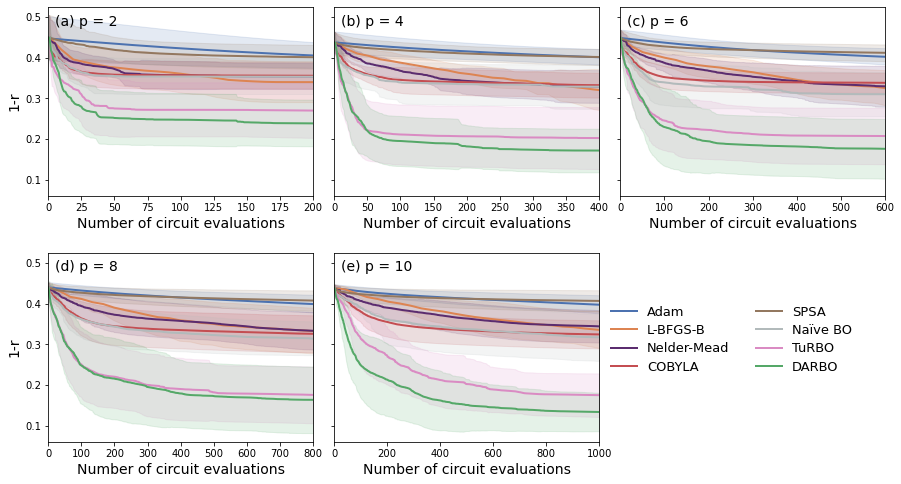

In [4]:
# SI-Figure S3
# Information on 5 w3d N=16 graph instances

true_value_weight = [-10.93,-8.89,-7.2,-10.36,-9.07]
sumweight = [13.79,12.57,8.94,11.82,9.87]
cost = [12.36,10.73,8.07,11.09,9.47]

# Information on w3d N=10,12,14,16,18 graph instances
# true_value_weight = [-4.860323803122274, -6.394783946244716, -7.640195471670438,-10.93,-9.00584969657777]
# sumweight = [5.763621114045465, 7.738411838580576, 9.88721807584734,13.79,10.45062596899525]
# cost = [5.3119724585838695, 7.066597892412646, 8.763706773758889,12.36,9.72823783278651]

fig, axes = plt.subplots(2,3, figsize=(15,8), sharey = True)
axes[1][2].set_visible(False)
axes[0][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][1].set_prop_cycle('color', sns.color_palette("deep", 10))

p = [2,4,6,8,10]

labels = ['Adam', 'L-BFGS-B', 'Nelder-Mead', 'COBYLA', 'SPSA', 'Naïve BO', 'TuRBO', 'DARBO']
color = ['#4c72b0', '#dd8452', '#5B2C6F', '#c44e52', '#937860', '#B2BABB', '#da8bc3', '#55a868']

counter = 0 
for j in p:
    loss_avg = np.loadtxt('for_plotting/graph0_nonoise_loss_p{}.txt'.format(j))
    loss_err = np.loadtxt('for_plotting/graph0_nonoise_losserr_p{}.txt'.format(j))
    for i in range(8):
        if i in [0,1]:
            xrange = np.arange(0,1000)*(4*j+1)+1
        else:
            xrange = np.arange(1,1001)
        if counter < 3:
            pos = [0, counter]
        else:
            pos = [1, counter-3]
        axes[pos[0]][pos[1]].plot(xrange, 1-(sumweight[0]-loss_avg[:, i])/2/cost[0], label=labels[i], linewidth=2, color = color[i])
        axes[pos[0]][pos[1]].fill_between(xrange, np.subtract(1-(sumweight[0]-loss_avg[:, i])/2/cost[0], loss_err[:, i]/2/cost[0]), np.add(1-(sumweight[0]-loss_avg[:, i])/2/cost[0], loss_err[:, i]/2/cost[0]), color = color[i], alpha = 0.15)
        axes[pos[0]][pos[1]].set_xlabel('Number of circuit evaluations', fontsize=14)
        axes[pos[0]][pos[1]].set_xlim([0, j*100])

    counter = counter + 1
#    axes[pos[0]][pos[1]].plot(np.arange(1,1001), true_value_weight[0]*np.ones(1000), label='Exact loss', linestyle='dashed', color='k',linewidth=2)

#ax1.set_ylim([0.02, 0.42])
# ax0.set_xticks([2, 4, 6, 8,10])

lgd=axes[1][1].legend(frameon=False,fancybox=False,bbox_to_anchor=(1.0,0.3),labelspacing=0.4,loc=3,fontsize=13,ncol=2)
axes[0][0].set_ylabel('1-r', fontsize=14)
axes[1][0].set_ylabel('1-r', fontsize=14)
axes[0][0].text(5, 0.48, '(a) p = 2', fontsize=14)
axes[0][1].text(10, 0.48, '(b) p = 4', fontsize=14)
axes[0][2].text(15, 0.48, '(c) p = 6', fontsize=14)
axes[1][0].text(20, 0.48, '(d) p = 8', fontsize=14)
axes[1][1].text(25, 0.48, '(e) p = 10', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.08)
plt.savefig('si_figures/s3_graph0_nonoise_avgr.pdf', dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


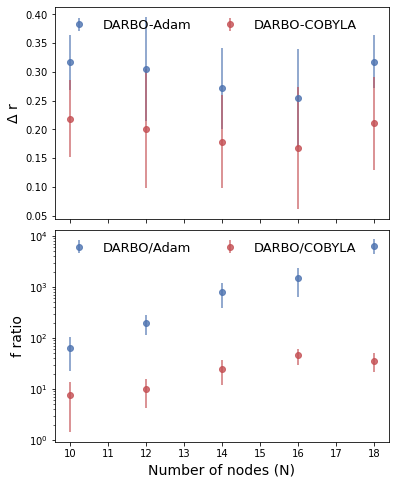

In [95]:
# SI-Figure S4
fig, axes = plt.subplots(2,1, figsize=(6,8), sharex=True)

diff_N_results = np.loadtxt('for_plotting/diff_N_nonoise_r_p10.txt')
diff_N_f = np.loadtxt('for_plotting/diff_N_nonoise_f_p10.txt')
labels = ['DARBO-Adam', 'DARBO-COBYLA']
labels2 = ['DARBO/Adam', 'DARBO/COBYLA']
color = ['#4c72b0', '#c44e52']
for i in range(2):
    axes[0].errorbar(x=diff_N_results[:, 0],y=diff_N_results[:, i*2+1], yerr= diff_N_results[:, i*2+2], color = color[i], fmt='o', label = labels[i], alpha = 0.8)
    axes[1].errorbar(x=diff_N_f[:, 0],y=diff_N_f[:, i*2+1], yerr= diff_N_f[:, i*2+2], color = color[i], fmt='o', label = labels2[i], alpha = 0.8)
axes[0].set_ylabel('$\Delta$ r', fontsize=14)
axes[1].set_ylabel('f ratio', fontsize=14)
axes[1].set_yscale('log')
axes[1].set_xlabel('Number of nodes (N)', fontsize=14)
axes[0].legend(frameon=False,fancybox=False,labelspacing=0.4,loc=2,fontsize=13,ncol=2)
axes[1].legend(frameon=False,fancybox=False,labelspacing=0.4,loc=2,fontsize=13,ncol=2)
plt.subplots_adjust(hspace=0.05, wspace=0.08)
plt.savefig('si_figures/s4_diff_N_nonnoise_p10.pdf'.format(p), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

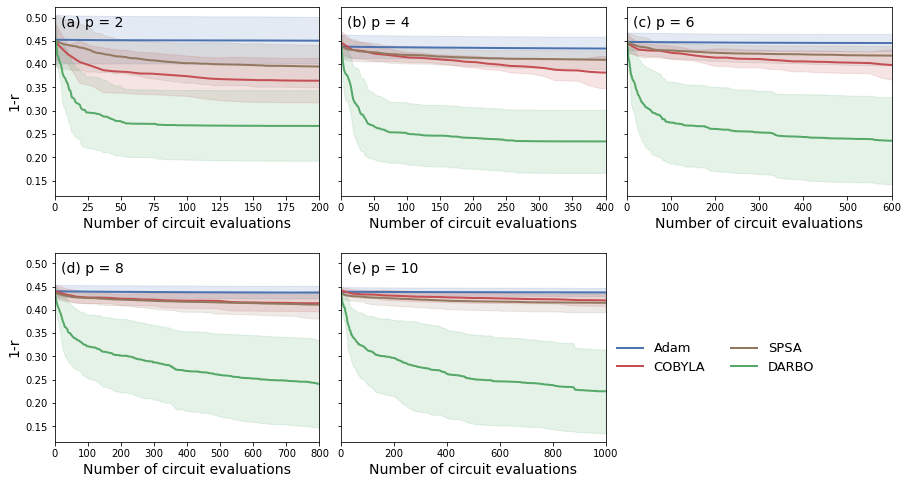

In [11]:
# SI-Figure S5
true_value_weight = [-10.93,-8.89,-7.2,-10.36,-9.07]
# sumweight = [13.79,12.57,8.94,11.82,9.87]
# cost = [12.36,10.73,8.07,11.09,9.47]

fig, axes = plt.subplots(2,3, figsize=(15,8), sharey = True)
axes[1][2].set_visible(False)
axes[0][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][1].set_prop_cycle('color', sns.color_palette("deep", 10))

p = [2,4,6,8,10]
n = 200

# labels = ['Adam', 'L-BFGS-B', 'Nelder-Mead', 'COBYLA', 'SPSA', 'Naïve BO', 'TuRBO', 'Switch TuRBO']
# color = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#937860', '#FFC300', '#da8bc3', '#55a868']
labels = ['Adam', 'COBYLA', 'SPSA','DARBO']
color = ['#4c72b0', '#c44e52', '#937860', '#55a868']

counter = 0 
for j in p:
    loss_avg = np.loadtxt('for_plotting/graph0_noise_loss/graph0_noise_loss_p{}_{}.txt'.format(j,n))
    loss_err = np.loadtxt('for_plotting/graph0_noise_loss/graph0_noise_losserr_p{}_{}.txt'.format(j,n))
    for i in range(4):
        if i in [0,1]:
            xrange = np.arange(0,1000)*(4*j+1)+1
        else:
            xrange = np.arange(1,1001)
        if counter < 3:
            pos = [0, counter]
        else:
            pos = [1, counter-3]
        axes[pos[0]][pos[1]].plot(xrange, 1-(sumweight[0]-loss_avg[:, i])/2/cost[0], label=labels[i], linewidth=2, color = color[i])
        axes[pos[0]][pos[1]].fill_between(xrange, np.subtract(1-(sumweight[0]-loss_avg[:, i])/2/cost[0], loss_err[:, i]/2/cost[0]), np.add(1-(sumweight[0]-loss_avg[:, i])/2/cost[0], loss_err[:, i]/2/cost[0]), color = color[i], alpha = 0.15)
        axes[pos[0]][pos[1]].set_xlabel('Number of circuit evaluations', fontsize=14)
        axes[pos[0]][pos[1]].set_xlim([0, j*100])
        
    counter = counter + 1
#    axes[pos[0]][pos[1]].plot(np.arange(1,1001), true_value_weight[0]*np.ones(1000), label='Exact loss', linestyle='dashed', color='k',linewidth=2)

#ax1.set_ylim([0.02, 0.42])
# ax0.set_xticks([2, 4, 6, 8,10])

lgd=axes[1][1].legend(frameon=False,fancybox=False,bbox_to_anchor=(1.0,0.3),labelspacing=0.4,loc=3,fontsize=13,ncol=2)
axes[0][0].set_ylabel('1-r', fontsize=14)
axes[1][0].set_ylabel('1-r', fontsize=14)
axes[0][0].text(5, 0.48, '(a) p = 2', fontsize=14)
axes[0][1].text(10, 0.48, '(b) p = 4', fontsize=14)
axes[0][2].text(15, 0.48, '(c) p = 6', fontsize=14)
axes[1][0].text(20, 0.48, '(d) p = 8', fontsize=14)
axes[1][1].text(25, 0.48, '(e) p = 10', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.08)
plt.savefig('si_figures/s5_graph0_noise_avgr_{}.pdf'.format(n), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


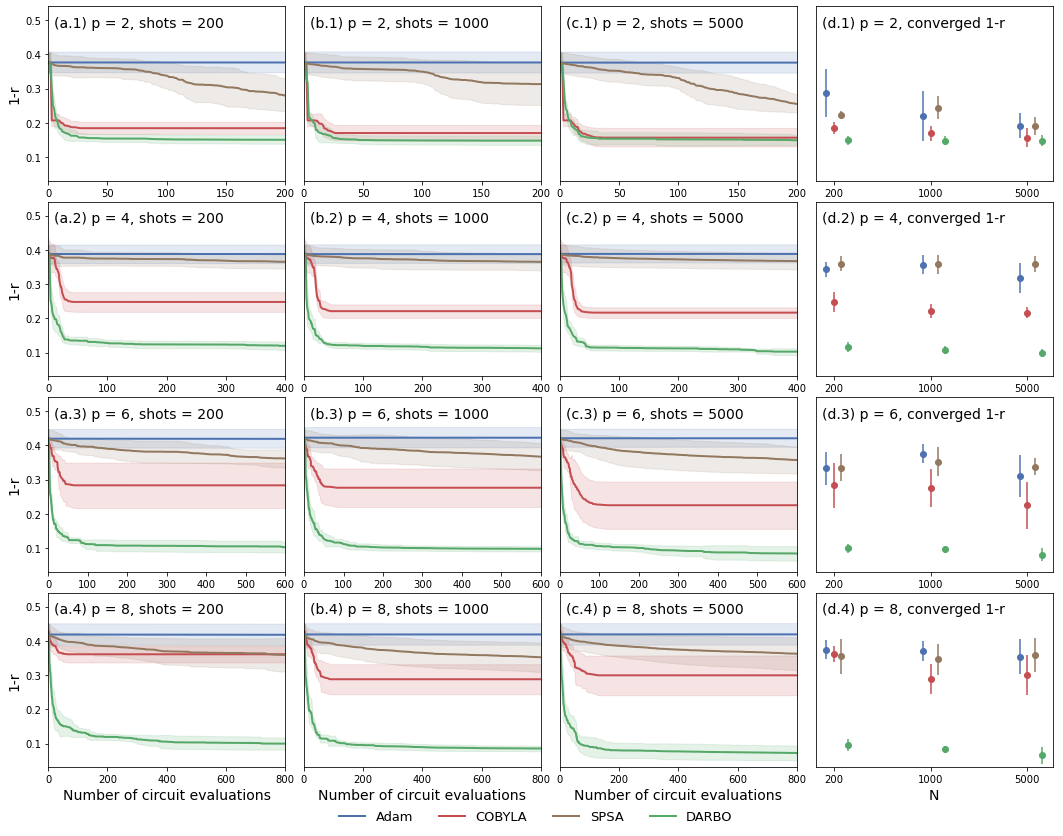

In [12]:
# SI-Figure S6
fig, axes = plt.subplots(4,4, figsize=(18,14))
for i in range(4):
    for j in range(4):
        axes[i][j].set_prop_cycle('color', sns.color_palette("deep", 10))

p = [2,4,6,8]
n = [200,1000,5000]

labels = ['Adam', 'COBYLA', 'SPSA', 'DARBO']
color = ['#4c72b0', '#c44e52','#937860', '#55a868']
for m in range(4):
    pos = 0 
    for j in n:
        r = np.load('for_plotting/allgraph_noise_loss/allgraph_noise_bestr_p{}_{}.npy'.format(p[m], j))
        for i in range(4):
            data = r[i]
            loss_avg = np.mean(data, axis = 0)
            loss_err = np.std(data, axis = 0)
            if i == 0:
                xrange = np.arange(0,1000)*(4*j+1)+1
            else:
                xrange = np.arange(1,1001)
            axes[m][pos].plot(xrange, 1-loss_avg, label=labels[i], linewidth=2, color = color[i])
            axes[m][pos].fill_between(xrange, np.subtract(1-loss_avg, loss_err), np.add(1-loss_avg, loss_err), color = color[i], alpha = 0.15)
            axes[m][pos].set_xlim([0, p[m]*100])
            axes[m][pos].set_ylim([0.03, 0.54])
            if m == 3:
                axes[m][pos].set_xlabel('Number of circuit evaluations', fontsize=14)
                axes[m][3].set_xlabel('N', fontsize=14)
        pos = pos + 1

    axes[m][3].yaxis.set_label_position("right")
    axes[m][3].yaxis.tick_right()
    axes[m][3].set_ylim([0.03, 0.54])
    axes[m][1].set_yticks([])
    axes[m][2].set_yticks([])
    axes[m][3].set_yticks([])

    bestr=[]
    for i in range(3):
        bestr.append(np.loadtxt('for_plotting/allgraph_noise_bestr_{}.txt'.format(n[i]))[int(p[m]/2)-1, :])
    bestr = np.vstack(bestr)
    for i in range(4):
        axes[m][3].errorbar(x=2*np.arange(3)+0.15*(i-1),y=1-bestr[:,2*i], yerr= bestr[:,2*i+1], color = color[i], fmt='o', label = labels[i])
    axes[m][3].set_xticks([0, 2, 4], [200, 1000, 5000])
    axes[m][0].set_ylabel('1-r', fontsize=14)
    axes[m][0].text(5*p[m]/2, 0.48, '(a.{}) p = {}, shots = 200'.format(m+1, p[m]), fontsize=14)
    axes[m][1].text(5*p[m]/2, 0.48, '(b.{}) p = {}, shots = 1000'.format(m+1, p[m]), fontsize=14)
    axes[m][2].text(5*p[m]/2, 0.48, '(c.{}) p = {}, shots = 5000'.format(m+1, p[m]), fontsize=14)
    axes[m][3].text(-0.25, 0.48, '(d.{}) p = {}, converged 1-r'.format(m+1, p[m]), fontsize=14)

lgd=axes[3][1].legend(frameon=False,fancybox=False,bbox_to_anchor=(0.1,-0.18),labelspacing=0.4,loc=2,fontsize=13,ncol=4)

plt.subplots_adjust(hspace=0.12, wspace=0.08)
plt.savefig('si_figures/s6_allgraph_noise_bestr_p2-8.pdf'.format(p), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

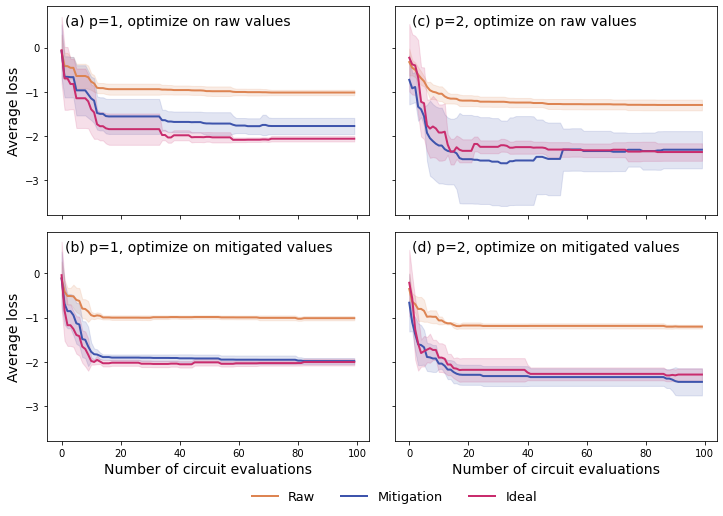

In [15]:
# SI-Figure S7
fig, axes = plt.subplots(2,2, figsize=(12,8), sharey=True, sharex=True)
p = [1,2]
mode = ['optraw', 'optmit']
for n in p:
    for m in range(2):
        raw = []
        mit = []
        ideal = []
        for j in range(5):
            raw.append(np.load('../results/hardware/{}/Y_raw_hardware_exp_DARBO_{}_100_trial{}_p{}.npy'.format(mode[m],mode[m],j,n))[:100])
            mit.append(np.load('../results/hardware/{}/Y_mit_hardware_exp_DARBO_{}_100_trial{}_p{}.npy'.format(mode[m],mode[m],j,n))[:100])
            ideal.append(np.load('../results/hardware/{}/Y_ideal_hardware_exp_DARBO_{}_100_trial{}_p{}.npy'.format(mode[m],mode[m],j,n))[:100])
        raw, mit, ideal = np.hstack(raw), np.hstack(mit),  np.hstack(ideal)
        raw_results, raw_err, mit_results, mit_err,ideal_results, ideal_err  = [], [], [], [],[], []
        for i in range(1,101):
            if m == 0:
                loc = np.argmin(raw[0:i, :], axis = 0)
            else:
                loc = np.argmin(mit[0:i, :], axis = 0)
            raw_results.append(np.mean(np.diag(raw[loc, :])))
            raw_err.append(np.std(np.diag(raw[loc, :])))
            mit_results.append(np.mean(np.diag(mit[loc, :])))
            mit_err.append(np.std(np.diag(mit[loc, :])))
            ideal_results.append(np.mean(np.diag(ideal[loc, :])))
            ideal_err.append(np.std(np.diag(ideal[loc, :])))
        axes[m][n-1].plot(np.arange(0,100), raw_results, '-', label='Raw', color ='#dd8452', linewidth=2)
        axes[m][n-1].fill_between(np.arange(0,100), np.subtract(raw_results, raw_err), np.add(raw_results,raw_err), color = '#dd8452', alpha = 0.15)
        axes[m][n-1].plot(np.arange(0,100), mit_results, '-', label='Mitigation', color ='#3E54AC', linewidth=2)
        axes[m][n-1].fill_between(np.arange(0,100), np.subtract(mit_results, mit_err), np.add(mit_results,mit_err), color = '#3E54AC', alpha = 0.15)
        axes[m][n-1].plot(np.arange(0,100), ideal_results, '-', label='Ideal', color ='#C92C6D', linewidth=2)
        axes[m][n-1].fill_between(np.arange(0,100), np.subtract(ideal_results, ideal_err), np.add(ideal_results,ideal_err), color = '#C92C6D', alpha = 0.15)

axes[1][0].set_xlabel('Number of circuit evaluations', fontsize=14)
axes[1][1].set_xlabel('Number of circuit evaluations', fontsize=14)
axes[0][0].set_ylabel('Average loss', fontsize=14)
axes[1][0].set_ylabel('Average loss', fontsize=14)

lgd=axes[1][0].legend(frameon=False,fancybox=False,bbox_to_anchor=(0.6,-0.18),labelspacing=0.4,loc=2,fontsize=13,ncol=3)
axes[0][0].text(1, 0.5, '(a) p=1, optimize on raw values', fontsize=14)
axes[1][0].text(1, 0.5, '(b) p=1, optimize on mitigated values', fontsize=14)
axes[0][1].text(1, 0.5, '(c) p=2, optimize on raw values', fontsize=14)
axes[1][1].text(1, 0.5, '(d) p=2, optimize on mitigated values', fontsize=14)
plt.subplots_adjust(hspace=0.08, wspace=0.08)
plt.savefig('si_figures/s7_additional_hardware_opt_loss_curve.pdf'.format(p), dpi=800, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
